In [16]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import uproot
import itertools

In [17]:
defaultPars = {'figure.figsize': (5, 4),
               'lines.markersize' : 4,
               'axes.titlesize' : 13,
               'font.size' : 13,
               'axes.labelsize' : 16,
               'xtick.labelsize' : 13,
               'ytick.labelsize' : 13,
               'legend.fontsize' : 10,
               "text.usetex": True,
               "font.family": "sans-serif",
               "font.sans-serif": ["Helvetica"],
               'font.family':'Times New Roman', 
               'font.serif':'Times New Roman',
               "savefig.dpi" : 300,
               'contour.linewidth' : 2.0,
               'lines.linewidth' : 2.0,
               'axes.grid' : True,
               'grid.linewidth' : 0.5,
               'grid.color' : 'lightgray',
               'axes.axisbelow' : True
               }
plt.rcParams.update(defaultPars)

In [18]:
file = './pp2chi0chi0J_test/Events/run_02/ddmH_mS_250_m1_122_dm_90_delphes_events.root'
f = uproot.open(file)
events = f.get('Delphes')
# llps= f.arrays(filter_name="llpParticles*")

In [19]:
Px = events['llpParticles/llpParticles.Px'].array().to_numpy()
Py = events['llpParticles/llpParticles.Py'].array().to_numpy()
Pz = events['llpParticles/llpParticles.Pz'].array().to_numpy()
E = events['llpParticles/llpParticles.E'].array().to_numpy()

In [20]:
PxMom = events['llpMothers/llpMothers.Px'].array().to_numpy()[:,0]
PyMom = events['llpMothers/llpMothers.Py'].array().to_numpy()[:,0]
PzMom = events['llpMothers/llpMothers.Pz'].array().to_numpy()[:,0]
EMom = events['llpMothers/llpMothers.E'].array().to_numpy()[:,0]

In [21]:
PxTot = np.sum(Px,axis=1)
PyTot = np.sum(Py,axis=1)
PzTot = np.sum(Pz,axis=1)
ETot = np.sum(E,axis=1)

In [22]:
PTtot = np.sqrt(PxTot**2 + PyTot**2)
Mtot = np.sqrt(ETot**2 - PxTot**2 - PyTot**2 - PzTot**2)

MtotMom = np.sqrt(EMom**2 - PxMom**2 - PyMom**2 - PzMom**2)

In [23]:
# for ievt,m in enumerate(MtotMom):
#     M = Mtot[ievt]
#     if m < 200.0:
#         continue
#     if abs(M-m)/m > 0.1:
#         print('Differ=',M,m,ievt)
#         break
# print(PxMom[ievt],PyMom[ievt],PzMom[ievt],EMom[ievt])
# print(PxTot[ievt],PyTot[ievt],PzTot[ievt],ETot[ievt])
# print(Mtot[ievt],MtotMom[ievt])

In [24]:
# r = Mtot/MtotMom
# ievt = np.argwhere(r > 10.0)[0,0]
# print(ievt)
# print(PxMom[ievt],PyMom[ievt],PzMom[ievt],EMom[ievt])
# print(PxTot[ievt],PyTot[ievt],PzTot[ievt],ETot[ievt])
# print(Mtot[ievt],MtotMom[ievt])

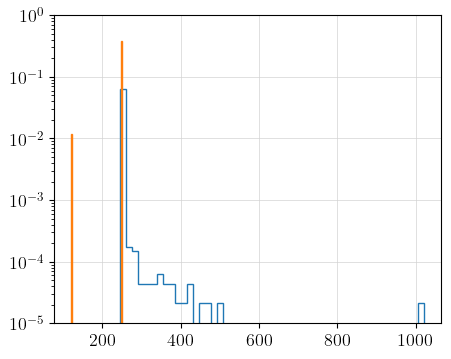

In [25]:
plt.hist(Mtot,bins=50,histtype='step',density=True)
plt.hist(MtotMom,bins=50,histtype='step',density=True)
plt.yscale('log')
# plt.xlim(200,300)
plt.ylim(1e-5,1)
plt.show()

In [26]:
len(Mtot[Mtot > 500.])/len(Mtot)

0.0003303600925008259

In [27]:
file = './pp2Sd/Events/run_01/ddmH_mS_500_m1_244_dm_90_delphes_events.root'
f = uproot.open(file)
events = f.get('Delphes')
# llps= f.arrays(filter_name="llpParticles*")

In [28]:
files = {
         'with matching' : './pp2SdJ/Events/run_01/ddmH_mS_500_m1_244_dm_90_delphes_events.root',
         'without matching' : './pp2Sd/Events/run_01/ddmH_mS_500_m1_244_dm_90_delphes_events.root',
         }

pT = {}
eta = {}
dR = {}
cols = ['label',r'$p_T(S)$ (GeV)']

nmax = -1
dataList = []
for label,f in files.items():    
    ievt = 0
    file = uproot.open(f)
    events = file.get('Delphes')
    sdPT = events['llpParticles/llpParticles.PT'].array()
    sdPT = sdPT.to_numpy().flatten()

    dataList += list(zip(itertools.repeat(label,len(sdPT)),sdPT))
    
df = pd.DataFrame(columns=cols,data=dataList)
        

/tmp/ipykernel_17471/1805150701.py:40: RuntimeWarning: divide by zero encountered in divide
  r_y = np.divide(y,y0)
/tmp/ipykernel_17471/1805150701.py:40: RuntimeWarning: invalid value encountered in divide
  r_y = np.divide(y,y0)
/tmp/ipykernel_17471/1805150701.py:41: RuntimeWarning: invalid value encountered in divide
  r_error = r_y*np.sqrt((yerr/y)**2 + (y0Err/y0)**2)


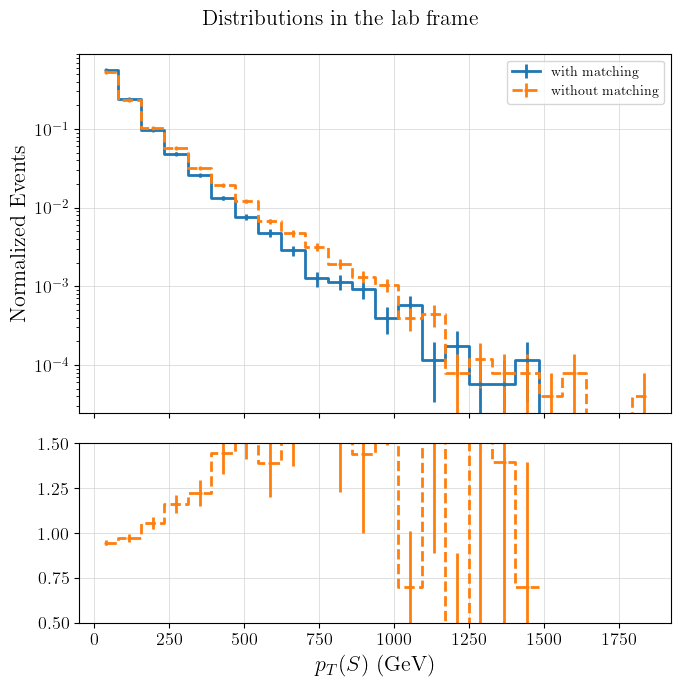

In [29]:
plot_variable = r'$p_T(S)$ (GeV)'


ncols = 1

fig, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 1]},figsize=(7,7))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)


i = 0
var = plot_variable

v_max, v_min = df[var].max(),df[var].min()
bins = np.linspace(v_min,v_max,25)
bin_centers = 0.5*(bins[1:] + bins[:-1])
ax = axarr[i]
ymax = 0.0
yList = []
yErrList = []
for j,label in enumerate(df['label'].unique()):
    if 'with matching' in label:
        ls = 'solid'
    else:
        ls = 'dashed'
    data = df[df['label'] == label]
    y,_ = np.histogram(data[var], bins=bins)
    yerr = np.sqrt(y)
    norm = sum(y)
    y = y/norm
    ymax = max(ymax,y.max())
    yerr = yerr/norm
    p = ax.errorbar(bin_centers,y,yerr = yerr,marker = '.',drawstyle = 'steps-mid',
                label=label,linewidth=2,linestyle=ls)
    
    if j == 0:
        y0 = y
        y0Err = yerr
        continue
    
    r_y = np.divide(y,y0)
    r_error = r_y*np.sqrt((yerr/y)**2 + (y0Err/y0)**2)
    axarr[1].errorbar(bin_centers,r_y,yerr = r_error,marker = '.',drawstyle = 'steps-mid',
                label=label,linewidth=2,linestyle=ls,color=p[0].get_color())



ax.set_ylabel('Normalized Events')
if i == 0:
    ax.legend()
# ax.set_ylim(0.0,1.1*ymax)
ax.set_yscale('log')

# for y,yErr in zip(yList[1:],yErrList[1:]):
#     r_y = np.divide(y,yList[0])
#     r_error = r_y*np.sqrt((y/yErr)**2 + (yList[0]/yErrList[0])**2)
#     ax.errorbar(bin_centers,r_y,yerr = r_error,marker = '.',drawstyle = 'steps-mid',
#                 label=label,linewidth=2,linestyle=ls)
#     axarr[1].hist(bin_centers,weights=,histtype='step',linewidth=3,bins=bins)
axarr[1].set_ylim(0.5,1.5)
axarr[1].set_xlabel(var)

fig.suptitle("Distributions in the lab frame")
plt.tight_layout()
# plt.savefig('spin_dists.png')
plt.show()